<a href='http://www.holoviews.org'><img src="assets/hv+bk.png" alt="HV+BK logos" width="40%;" align="left"/></a>
<div style="float:right;"><h2>02. Customizing Visual Appearance</h2></div>

Section 01 focused on specifying elements and simple collections of them.  This section explains how the visual appearance can be adjusted to bring out the most salient aspects of your data, or just to make the style match the overall theme of your document.


## Preliminaries

In the [introduction to elements](./01-introduction-to-elements), ``hv.extension('bokeh')`` was used at the start to load and activate the bokeh plotting extension. In this notebook, we will also briefly use [matplotlib](www.matplotlib.org) which we will load, but not yet activate, by listing it second:

In [13]:
# %%output backend='bokeh'

import pandas as pd
import holoviews as hv
hv.extension('bokeh')

ImportError: None of the backends could be imported

## Visualizing eclipse data

Let us find some interesting data to generate elements from, before we consider how to customize them. Here is a dataset containing information about all the [eclipses of the 21st century](https://en.wikipedia.org/wiki/List_of_solar_eclipses_in_the_21st_century):

In [8]:
eclipses = pd.read_csv('../data/eclipses_21C.csv', parse_dates=['date'])
eclipses.head()

,date,hour_local,hour_utc,type,magnitude,latitude,longitude
0,2001-06-21,12.259444,12.079444,Total,1.050,-11.3,2.7
1,2001-12-14,12.170278,20.883611,Annular,0.968,0.6,-130.7
2,2002-06-10,11.849444,23.756111,Annular,0.996,34.5,-178.6
3,2002-12-04,11.511111,7.537778,Total,1.024,-39.5,59.6
4,2003-05-31,2.522778,4.156111,Annular,0.938,66.6,-24.5


Here we have the date of each eclipse, what time of day the eclipse reached its peak in both local time and in UTC, the type of eclipse, its magnitude (fraction of the Sun's diameter obscured by the Moon) and the position of the peak in latitude and longitude.

Let's see what happens if we pass this dataframe to the [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) element:

:Curve   [date]   (hour_local,hour_utc,type,magnitude,latitude,longitude)
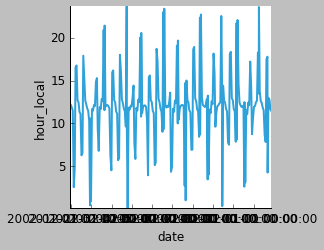

In [9]:
hv.Curve(eclipses)

We see that, by default, the first dataframe column becomes the *key dimension* (corresponding to the x-axis) and the second column becomes the *value dimension* (corresponding to the y-axis). There is clearly structure in this data, but the plot is too highly compressed in the x direction to see much detail, and you may not like the particular color or line style. So we can start customizing the appearance of this curve using the HoloViews [options system](http://holoviews.org/user_guide/Customizing_Plots.html).

## Types of option

If we want to change the appearance of what we can already see in the plot, we're no longer focusing on the data and metadata stored in the elements, but about details of the presentation.  Details specific to the final plo tare handled by the separate "options" system, not the element objects.  HoloViews allows you to set three types of options:

* **plot options**: Options that tell *HoloViews* how to *construct* the plot.
* **style options**: Options that tell the underlying *plotting extension* (Bokeh, matplotlib, etc.) how to *style* the plot
* **normalization options**: Options that tell *HoloViews* how to *normalize* the various elements in the plot against each other (not covered in this tutorial)


### Plot options

We noted that the data is too compressed in the x direction. Let us fix that by specifying the ``width`` plot option:

Unexpected plot option 'width' for Curve in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplotlib' renderer are: ['apply_extents', 'apply_ranges', 'apply_ticks', 'aspect', 'autotick', 'bgcolor', 'fig_alpha', 'fig_bounds', 'fig_inches', 'fig_latex', 'fig_rcparams', 'fig_size', 'final_hooks', 'finalize_hooks', 'fontsize', 'initial_hooks', 'interpolation', 'invert_axes', 'invert_xaxis', 'invert_yaxis', 'invert_zaxis', 'labelled', 'logx', 'logy', 'logz', 'normalize', 'projection', 'relative_labels', 'show_frame', 'show_grid', 'show_legend', 'show_title', 'sublabel_format', 'sublabel_position', 'sublabel_size', 'title_format', 'xaxis', 'xrotation', 'xticks', 'yaxis', 'yrotation', 'yticks', 'zaxis', 'zrotation', 'zticks']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.

:Curve   [date]   (hour_local,hour_utc,type,magnitude,latitude,longitude)
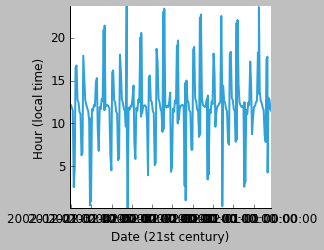

In [10]:
%%opts Curve [width=900]
hour_curve = hv.Curve(eclipses).redim.label(hour_local='Hour (local time)', date='Date (21st century)')
hour_curve

The top line uses a special IPython/Jupyter syntax called the ``%%opts`` *cell magic* to specify the ``width`` plot option for all [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) objects in this cell.  ``%%opts`` accepts a simple specification where we pass the ``width=900`` keyword argument to  [``Curve``](http://build.holoviews.org/reference/elements/bokeh/Curve.html) as a plot option (denoted by the *square brackets*).

Of course, there are other ways of applying options in HoloViews that do not require this IPython-specific syntax, but for this tutorial, we will only be covering the more-convenient magic-based syntax. You can read about the alternative approaches in the [user guide](http://holoviews.org/user_guide/Customizing_Plots.html).

In [ ]:
# Exercise: Try setting the height plot option of the Curve above.
# Hint: the magic supports tab completion when the cursor is in the square brackets!


In [ ]:
# Exercise: Try enabling the boolean show_grid plot option for the curve above


In [ ]:
# Exercise: Try set the x-axis label rotation (in degrees) with the xrotation plot option


#### Aside: ``hv.help``

Tab completion helps discover what keywords are available but you can get more complete help using the ``hv.help`` utility. For instance, to learn more about the options for ``hv.Curve`` run ``hv.help(hv.Curve)``:

In [ ]:
# hv.help(hv.Curve)


### Style options

The plot options earlier instructed HoloViews to build a plot 900 pixels wide, when rendered with the Bokeh plotting extension. Now let's specify that the Bokeh glyph should be 'red' and slightly thicker, which is information passed on directly to Bokeh (making it a style option):

In [ ]:
%%opts Curve (color='red' line_width=2)
hour_curve

Note how the plot options applied above to ``hour_curve`` are remembered! The ``%%opts`` magic is used to customize the *object* displayed as output for a particular code cell: behind the scenes HoloViews has linked the specified options to the ``hour_curve`` object via a hidden integer id attribute.

Having used the ``%%opts`` magic on ``hour_curve`` again, we have now associated the 'red' ``color`` *style option* to it. In the options specification syntax, style options are the keywords in *parentheses* and are keywords defined and used by Bokeh to style [line glyphs](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html#line-glyphs).



In [ ]:
# Exercise: Display hour_curve without any new options to verify it stays red


In [ ]:
# Exercise: Try setting the line_width style options to 1


In [ ]:
# Exercise: Try setting the  line_dash style option to 'dotdash'


## Switching to matplotlib

Let us now view our curve with matplotlib using the ``%%output`` cell magic:

In [ ]:
%%output backend='matplotlib'
hour_curve

All our options are gone! This is because the options are associated with the corresponding plotting extension---if you switch back to 'bokeh', the options will be applicable again. In general, options have to be specific to backends; e.g. the ``line_width`` style option accepted by Bokeh is called ``linewidth`` in matplotlib:

In [ ]:
%%output backend='matplotlib'
%%opts Curve [aspect=4 fig_size=400 xrotation=90] (color='blue' linewidth=2)
hour_curve

In [ ]:
# Exercise: Apply the matplotlib equivalent to line_dash above using linestyle='-.'

### The ``%output`` line magic

In the two cells above we repeated ``%%output backend='matplotlib'`` to use matplotlib to render those two cells. Instead of repeating ourselves with the cell magic, we can use a "line magic" (similar syntax to the cell magic but with one ``%``) to set things globally. Let us switch to matplotlib with a line magic and specify that we want SVG output:

In [ ]:
%output backend='matplotlib' fig='svg'

Unlike the cell magic, the line magic doesn't need to be followed by any expression and can be used anywhere in the notebook. Both the ``%output`` and ``%opts`` line magics set things globally so it is recommended you declare them at the top of your notebooks. Now let us look at the SVG matplotlib output we requested:

In [ ]:
%%opts Curve [aspect=4 fig_size=400 xrotation=70] (color='green' linestyle='--')
hour_curve

In [ ]:
# Exercise: Verify for yourself that the output above is SVG and not PNG
# You can do this by right-clicking above then selecting 'Open Image in a new Tab' (Chrome) or 'View Image' (Firefox)

## Switching back to bokeh

In previous releases of HoloViews, it was typical to switch to matplotlib in order to export to PNG or SVG, because Bokeh did not support these file formats. Since [Bokeh 0.12.6](https://bokeh.github.io/blog/2017/6/13/release-0-12-6/) we can now easily use HoloViews to export Bokeh plots to a PNG file, as we will now demonstrate:

In [ ]:
%output backend='bokeh'

By passing ``fig='png'`` and a ``filename='eclipses'`` to ``%output`` we can both render to PNG and save the output to file:

In [ ]:
%%output fig='png' filename='eclipses'
hour_curve.clone()

Here we have requested PNG format using ``fig='png'`` and that the output is output to eclipses.png using ``filename='eclipses'``:

In [ ]:
ls *.png

Bokeh also has some SVG support, but it is not yet exposed in HoloViews.

## Using ``group`` and ``label``

The above examples showed how to customize by type, but HoloViews offers multiple additional levels of customization that should be sufficient to cover any purpose. For our last example, let us split our eclipse dataframe based on the type ('Total' or 'Partial'):

In [ ]:
total_eclipses = eclipses[eclipses.type=='Total']
partial_eclipses = eclipses[eclipses.type=='Partial']

We'll now introduce the [``Spikes``](http://build.holoviews.org/reference/elements/bokeh/Spikes.html) element, and display it with a large width and without a y-axis. We can specify those options for all following [``Spikes``](http://build.holoviews.org/reference/elements/bokeh/Spikes.html) elements using the ``%opts`` *line magic*:

In [ ]:
%opts Spikes [width=900 yaxis=None] 

Now let us look at the hour of day at which these two types of eclipses occur (local time) by overlaying the two types of eclipse as [``Spikes``](http://build.holoviews.org/reference/elements/bokeh/Spikes.html) elements.  The problem then is finding a way to visually distinguish the spikes corresponding to the different ellipse types.

We can do this using the element ``group`` and ``label`` introduced in the [introduction to elements](./01-introduction-to-elements.ipynb) section as follows:

In [ ]:
%%opts Spikes.Eclipses.Total (line_dash='solid')
%%opts Spikes.Eclipses.Partial (line_dash='dotted')
total =   hv.Spikes(total_eclipses,   kdims=['hour_local'], vdims=[], group='Eclipses', label='Total')
partial = hv.Spikes(partial_eclipses, kdims=['hour_local'], vdims=[], group='Eclipses', label='Partial')
(total * partial).redim.label(hour_local='Local time (hour)')

Using these options to distinguish between the two categories of data with the same type, you can now see clear patterns of grouping between the two types, with many more total eclipses around noon in local time.  Similar techniques can be used to provide arbitrarily specific customizations when needed.

In [ ]:
# Exercise: Remove the two %%opts lines above and observe the effect


In [ ]:
# Exercise: Show all spikes with 'solid' line_dash, total eclipses in black and the partial ones in 'lightgray'


In [ ]:
# Optional Exercise: Try differentiating the two sets of spikes by group and not label


# Onwards

We have now seen some of the ways you can customize the appearance of your visualizations. You can consult our [Customizing Plots](http://holoviews.org/user_guide/Customizing_Plots.html) user guide to learn about other approaches, including the ``hv.opts`` and ``hv.output`` utilities which do not rely on notebook specific syntax. One last approach worth mentioning is the ``.opts`` method which accepts a customization specification dictionary or string to customize a particular object directly. When called without any arguments ``.opts()`` clears any customizations that may be set on that object.

In the [exploration with containers](./03-exploration-with-containers.ipynb) section that follows, you will also see a few examples of how the appearance of elements can be customized when viewed in containers.